# Linear Regression

The purpose of this document is to go over an example of Linear Regression using Python. This example uses the scikit-learn module in Pandas and looks at the Boston Housing dataset.


In [50]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from scipy import stats
from scipy.stats import pointbiserialr, spearmanr, skew, pearsonr

import sklearn
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn import linear_model


In [2]:
#load the inbuilt dataset
from sklearn.datasets import load_boston

In [3]:
#rename dataframe
boston = load_boston()

In [4]:
#look at the different keys
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

# Exploring the data

In [5]:
#First, we look at the dimension of the data.

#We see the data has 506 observations (rows) and 13 variables (columns).
boston.data.shape

(506, 13)

In [6]:
#Second, we look at the description of the data. It is important to know what each variables mean. 
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Third, we look at the features column. These will be the X variables (independent variables) in our model. Note that the data is already split into the feature and target variables. Our target variable (aka dependent variable) is the Median value of owner-occupied homes (in USD1000's).


In [7]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
#convert data to dataframe
df = pd.DataFrame(boston.data)

In [9]:
#make sure column names are retained
df.columns = boston.feature_names

In [10]:
# check for any missing values and catergorical values that need preprocessing. 
# We have no missing values and all varaibles are non-object.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
#Note that the target column is missing. So let's add that to the dataframe.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
df['Price'] = boston.target
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [13]:
df.describe(include = 'all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
# confirm no missing data
df[df.columns[df.isnull().sum() > 0].tolist()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Empty DataFrame

## Statistical Summary and Visualization

In [28]:
threshold = 0.8 # Threshold value.
def correlation():
    for i in df.columns:
        for j in df.columns[list(df.columns).index(i) + 1:]:
            if df[i].dtype != 'object' and df[j].dtype != 'object':
                #pearson is used by default for numerical.
                if abs(pearsonr(df[i], df[j])[0]) >= threshold:
                    yield (pearsonr(df[i], df[j])[0], i, j)
            else:
                #spearman works for categorical.
                if abs(spearmanr(df[i], df[j])[0]) >= threshold:
                    yield (spearmanr(df[i], df[j])[0], i, j)

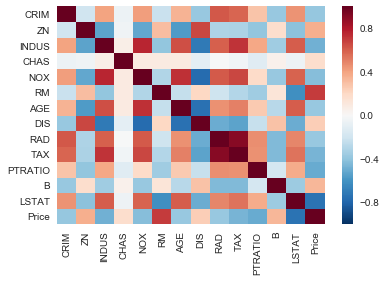

In [29]:
sns.heatmap(df.corr())

In [30]:
corr_list = list(correlation())
print(corr_list)

[(0.91022818853318699, 'RAD', 'TAX')]


 RAD and TAX are highly correlated. So, we need to be careful when including them in the model.


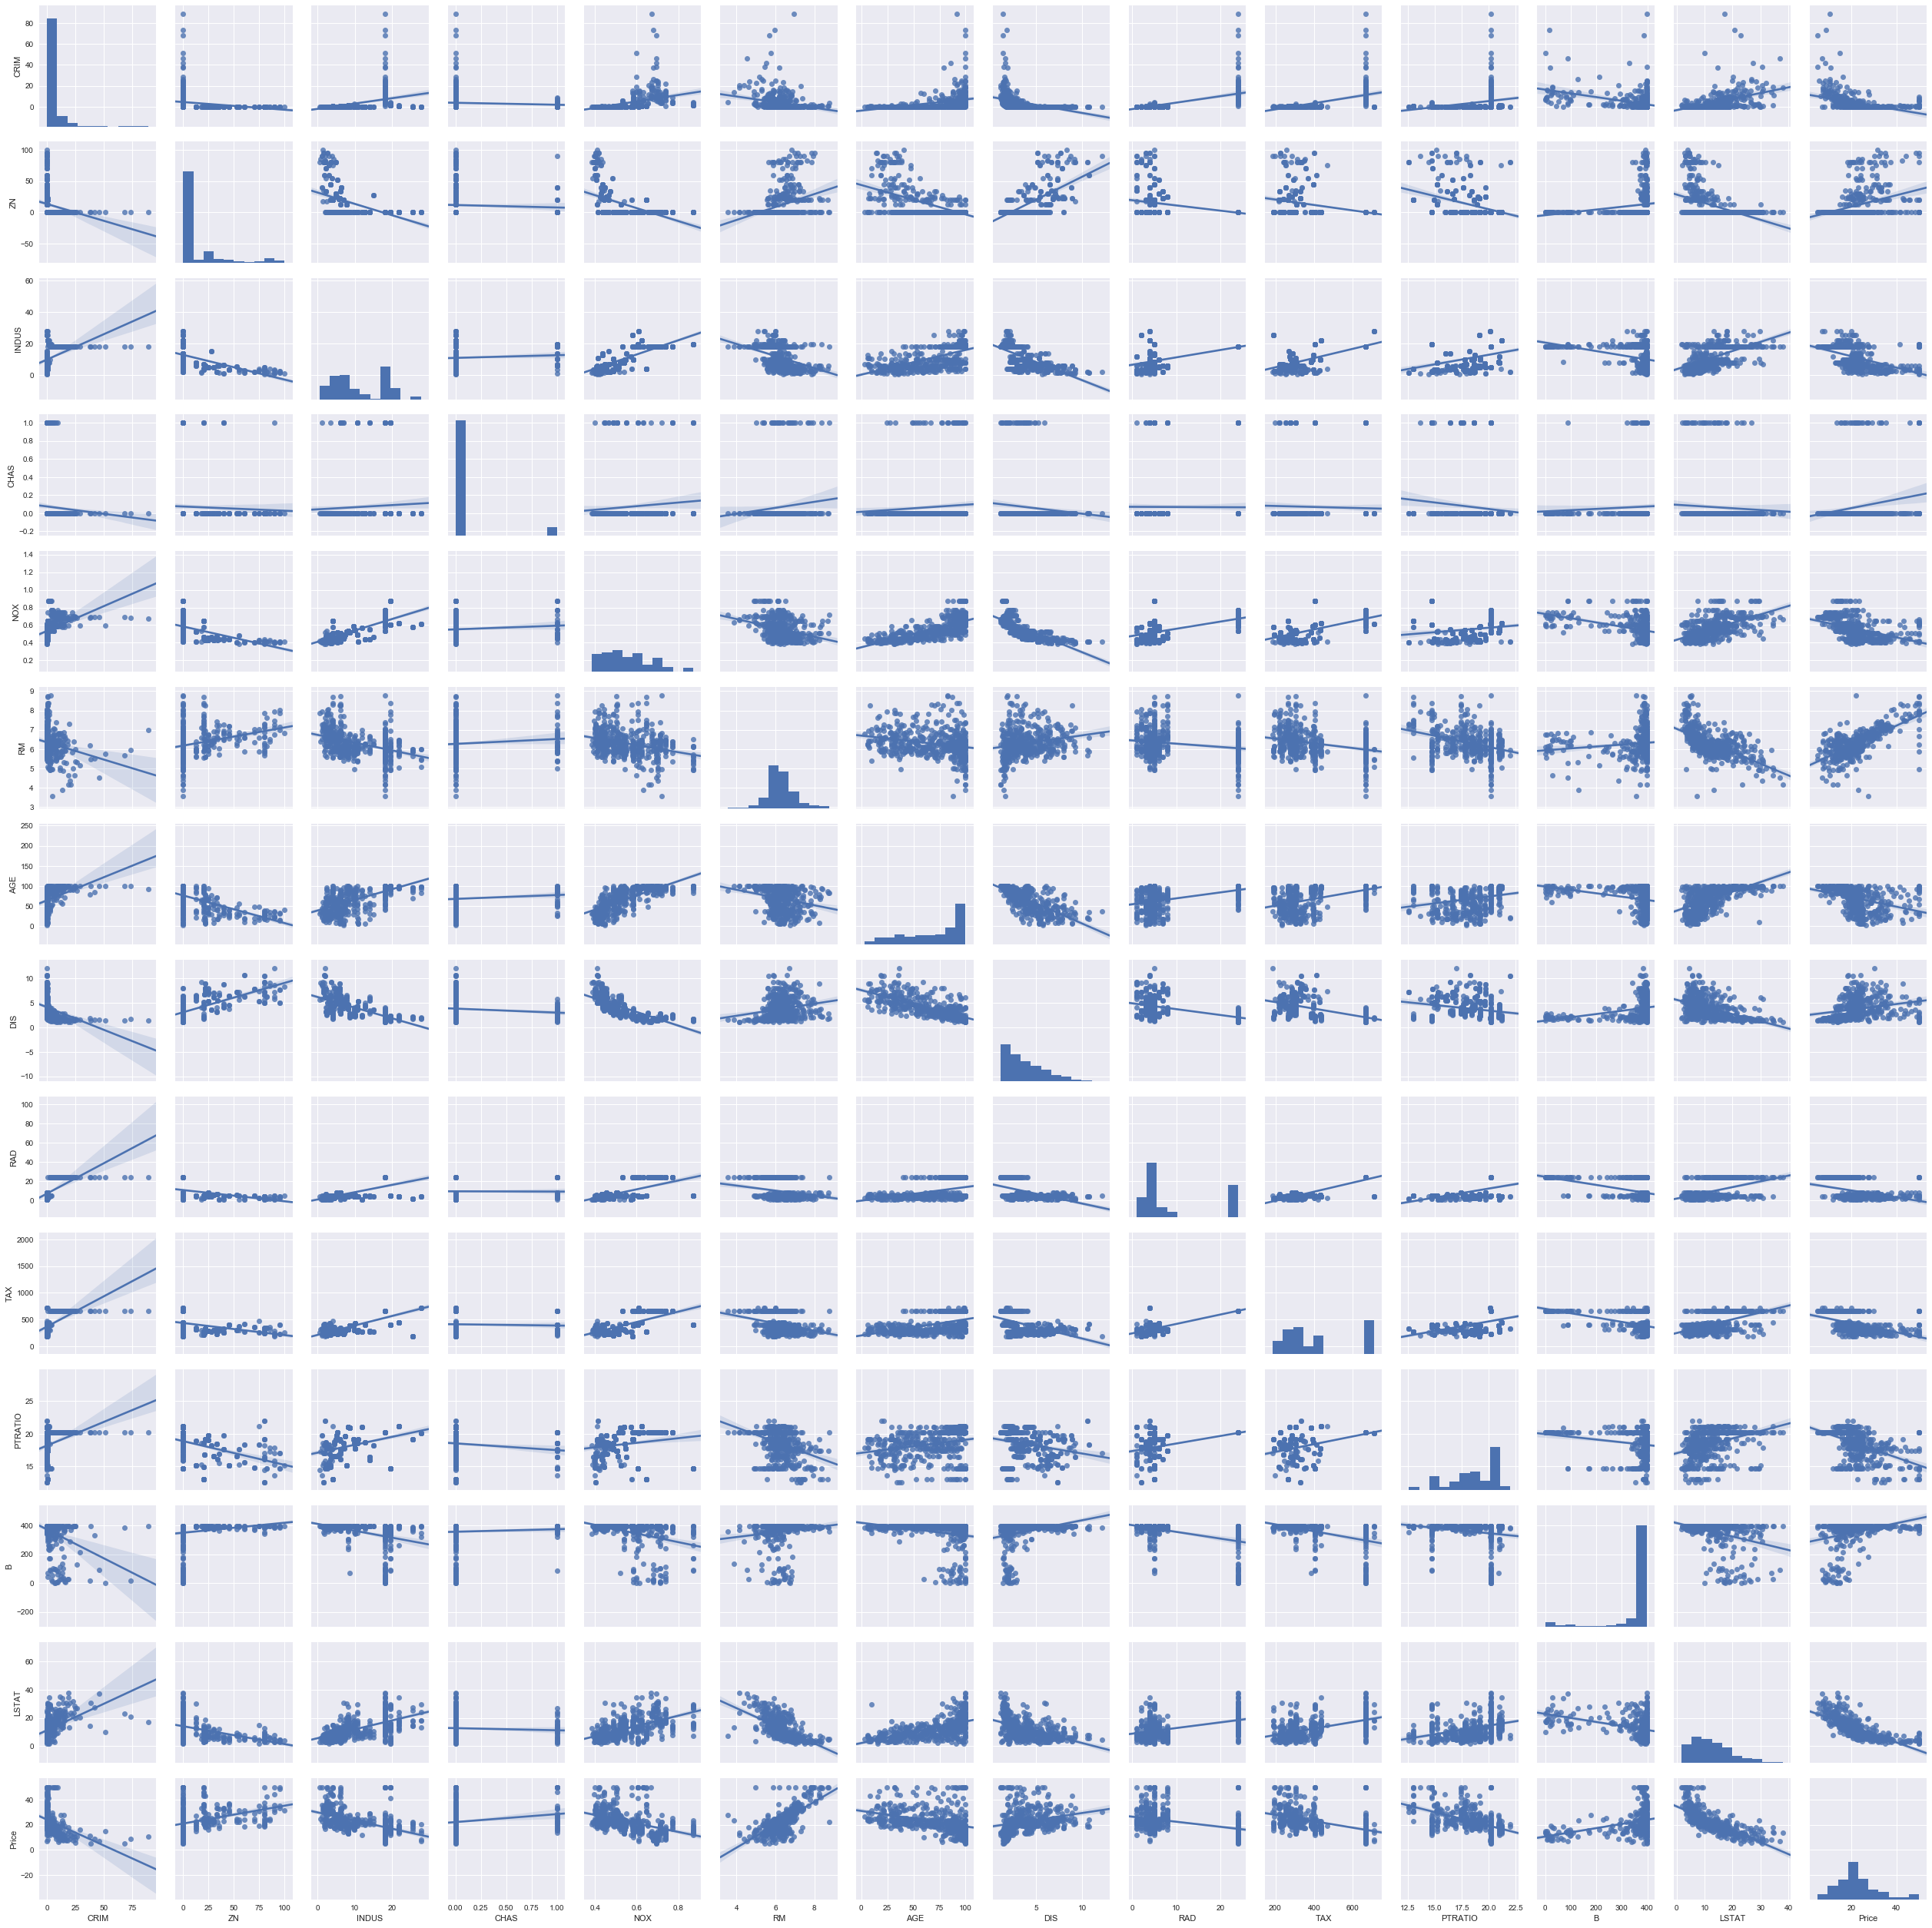

In [31]:
sns.pairplot(df, kind='reg')

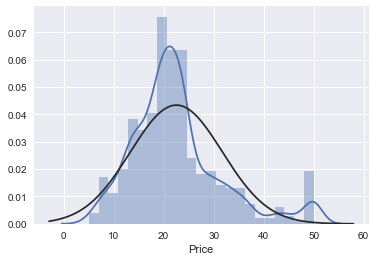

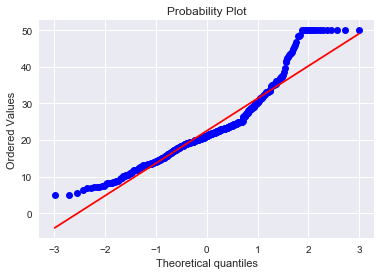

In [32]:
from scipy.stats import norm

sns.distplot(df['Price'],fit=norm)
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)

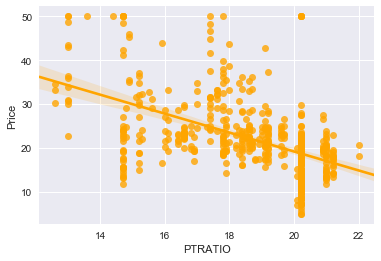

In [34]:
sns.regplot(x='PTRATIO', y='Price', data=df, color='Orange')


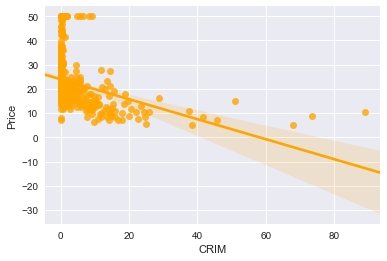

In [41]:
#Crime rate and price of house have a negative correlation. Price of house is highest where the crime rate is zero.
sns.regplot(x='CRIM', y='Price', data=df, color='Orange')


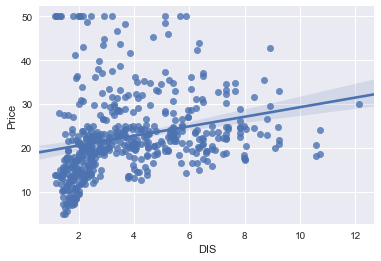

In [44]:
sns.regplot(x="DIS", y="Price", data=df);


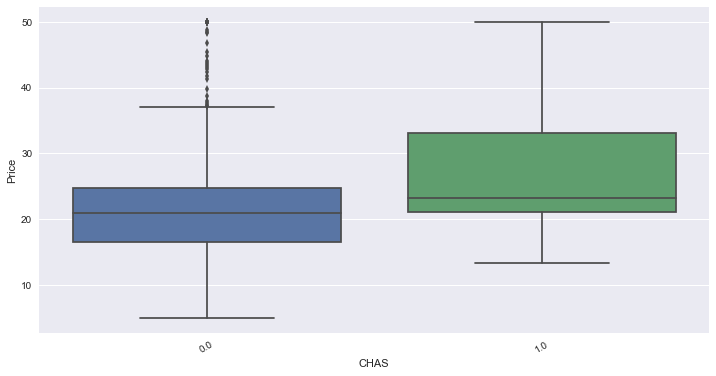

In [40]:
#price varies on whether the house is located near Charles River
plt.figure(figsize = (12, 6))
sns.boxplot(x='CHAS', y='Price',  data=df)
xt = plt.xticks(rotation=30)

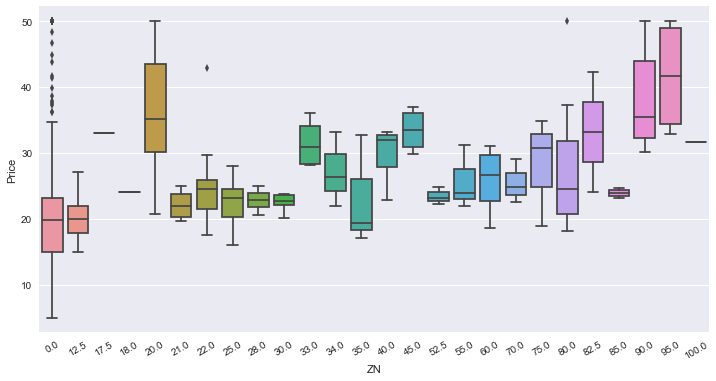

In [39]:
plt.figure(figsize = (12, 6))
sns.boxplot(x='ZN', y='Price',  data=df)
xt = plt.xticks(rotation=30)

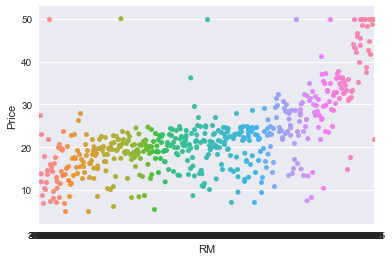

In [43]:
sns.stripplot(x="RM", y="Price", data=df)

In [46]:
X = df.drop('Price', axis = 1)
y = df.Price

In [47]:
# We will be using the linear regression model. 
#The dependent vairable is the price and the independent varialbes are the variables listed in the features column.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

lm = LinearRegression()

## Training the model

In [48]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [31]:
#fit the model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
#Function to measure accuracy.
def rmlse(val, target):
    return np.sqrt(np.sum(((np.log1p(val) - np.log1p(np.expm1(target)))**2) / len(target)))

## Model Evaluation

In [32]:
print(lm.intercept_)

-51.2583397971


In [81]:
#intercepts from fitting the model
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.156381
ZN,0.038549
INDUS,-0.025063
CHAS,0.786440
NOX,-12.946912
RM,4.002689
AGE,-0.011602
DIS,-1.368288
RAD,0.341757
TAX,-0.013515


## Predictions for the model

In [33]:
predictions = lm.predict(X_test)

In [34]:
X_testplt.scatter(y_test,predictions)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price2
226,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,3.627004
292,0.03615,80.0,4.95,0.0,0.4110,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70,3.328627
90,0.04684,0.0,3.41,0.0,0.4890,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,3.117950
373,11.10810,0.0,18.10,0.0,0.6680,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,2.624669
273,0.22188,20.0,6.96,1.0,0.4640,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58,3.561046
417,25.94060,0.0,18.10,0.0,0.6790,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64,2.341806
503,0.06076,0.0,11.93,0.0,0.5730,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,3.173878
234,0.44791,0.0,6.20,1.0,0.5070,6.726,66.5,3.6519,8.0,307.0,17.4,360.20,8.05,3.367296
111,0.10084,0.0,10.01,0.0,0.5470,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,3.126761
472,3.56868,0.0,18.10,0.0,0.5800,6.437,75.0,2.8965,24.0,666.0,20.2,393.37,14.36,3.144152


In [51]:
ridge = Ridge(alpha=10, solver='auto').fit(X_train, y_train)
val_ridge = np.expm1(ridge.predict(X_test))
rmlse(val_ridge, y_test)

5.4978304094483725

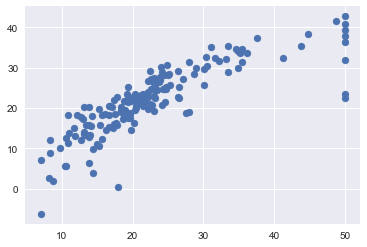

In [50]:
plt.scatter(y_test,predictions)

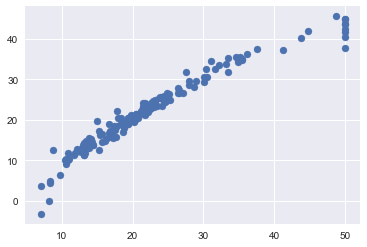

In [35]:
plt.scatter(y_test,predictions)

# Model Evaluation

In [51]:
from sklearn import metrics
#Mean Squared Error
mse = metrics.mean_squared_error(y_test, predictions)
print(mse)

28.5413672756


In [53]:
rmse = print(sklearn.metrics.mean_absolute_error(y_test, predictions))

3.46201051681


In [54]:
print(sklearn.metrics.r2_score(y_test, predictions))

0.695538800551
